**UNIVERSIDADE FEDERAL DA PARAÍBA** \
**CENTRO DE CIÊNCIAS SOCIAIS APLICADAS**\
**CIÊNCIA DE DADOS PARA NEGÓCIOS** 

# **Ferramenta de Aprendizagem Supervisionada para Previsão de eleição de Candidatos a Vereador das Câmaras Municipais do Estado da Paraíba**


## **1. Descrição**
Este projeto visa desenvolver uma ferramenta analítica a destinada a prever a elegibilidade de candidatos a vereador nas câmaras municipais da Paraíba. Utilizando algoritmos de aprendizado de máquina e análise de dados, a ferramenta analisa uma ampla gama de variáveis, tanto pessoais quanto contextuais.

## **2. Obtendo Dados do TSE**
- 2.1 Extraindo os dados dos Candidatos e Votos por Secção de 2020 da PB

In [1]:
import requests
import zipfile
from io import BytesIO
import os

def download_and_extract(url, specific_file=None):
    # Faz o download do arquivo ZIP
    response = requests.get(url)
    if response.status_code == 200:
        print(f'Download concluído com sucesso para {url}')
        with zipfile.ZipFile(BytesIO(response.content)) as thezip:
            if specific_file:
                # Extrai apenas o arquivo específico se fornecido
                all_files = thezip.namelist()
                for file in all_files:
                    if specific_file in file:
                        thezip.extract(file, '.')  # Extrai na pasta atual
                        print(f'Arquivo {file} extraído com sucesso!')
            else:
                # Extrai todos os arquivos se nenhum específico for fornecido
                thezip.extractall('.')
                print('Todos os arquivos foram extraídos com sucesso.')
    else:
        print(f'Erro no download do arquivo de {url}. Status Code: {response.status_code}')

def delete_file(filename):
    # Verifica se existe o arquivo
    if os.path.exists(filename):
        # Remove o arquivo 
        os.remove(filename)
        print(f'Arquivo {filename} apagado com sucesso.')
    else:
        print(f'Arquivo {filename} não encontrado.')

# Urls dos arquivos
urls_and_files = [
    ('https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2020.zip', 'consulta_cand_2020_PB.csv'),
    ('https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2020_PB.zip', None)
]

# Executa a função para cada URL e arquivo específico
for url, file_to_extract in urls_and_files:
    download_and_extract(url, file_to_extract)

# Apaga o arquivo leiame.pdf 
delete_file('leiame.pdf')

Download concluído com sucesso para https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2020.zip
Arquivo consulta_cand_2020_PB.csv extraído com sucesso!
Download concluído com sucesso para https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2020_PB.zip
Todos os arquivos foram extraídos com sucesso.
Arquivo leiame.pdf apagado com sucesso.


- 2.2 Leitura e Agrupamento da Tabela Votação por Secção para saber a quantidade de votos por Candidato

In [56]:
import pandas as pd
#Funcao de leitura e agrupar a soma dos votos por nome de candidato
def leitura_agrupar_dados(caminho_arquivo):
    
    data = pd.read_csv(caminho_arquivo, encoding='latin1', sep=';')
    data = data[data['CD_CARGO'] == 13]
    data = data[['NM_VOTAVEL', 'QT_VOTOS']]
    data = data.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().reset_index()
    
    data.rename(columns={'QT_VOTOS': 'SOMA_VOTOS'}, inplace=True)
    
    return data


caminho = "votacao_secao_2020_PB.csv"
data_resultado = leitura_agrupar_dados(caminho)
data_resultado

,NM_VOTAVEL,SOMA_VOTOS
0,ABELARDO BARRETO FILHO,77
1,ABELARDO TARGINO DA FONSECA NETO,88
2,ABILENE PEREIRA DA SILVA MACEDO,34
3,ABIMAEL BERNARDINO DA SILVA JUNIOR,257
4,ABLA EVERITTON DO NASCIMENTO,20
...,...,...
10677,ÂNGELO CÂNDIDO PEREIRA FILHO,626
10678,ÉRICA DUARTE ARRUDA,99
10679,ÉRICA MAIARA LIMA MONTEIRO,323
10680,ÍCARO DA COSTA LIMA,271


- 2.3 Leitura e Seleção das Variavéis de Interesse da Tabela de Candidatos 

In [57]:
#Leitura da tabela consulta candidato e seleção do cargo = Vereador, e dps selecionando somente as variaveis de interesse
data = pd.read_csv("consulta_cand_2020_PB.csv", encoding='latin1', sep=';')
data = data[data['CD_CARGO'] == 13]
data_selecionada = data[['NM_CANDIDATO','NR_PARTIDO', 'CD_GENERO', 'CD_ESTADO_CIVIL', 'CD_COR_RACA', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
        'VR_DESPESA_MAX_CAMPANHA', 'DT_NASCIMENTO',
        'DS_SIT_TOT_TURNO','SG_UE']]
data_selecionada

,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE
0,JOSE LEUDO MELQUIADES DE MEDEIROS,10,2,9,1,N,12,81452.82,20/04/1966,SUPLENTE,21172
1,JOSÉ SEVERINO DE SOUZA,51,2,3,1,N,12,164340.55,28/04/1978,NÃO ELEITO,19810
2,JOSE DE ASSIS DA SILVA,55,2,3,3,N,12,12307.75,04/10/1968,SUPLENTE,19070
3,JUDITE DIONÍSIO FIGUEREDO,23,4,1,3,N,12,12307.75,10/08/1975,SUPLENTE,22195
4,JOSE ROBERTO VENTURA BARBOSA,40,2,1,1,N,12,12307.75,20/08/1985,ELEITO POR QP,20001
...,...,...,...,...,...,...,...,...,...,...,...
12613,FRANCISCO WEVERTON DA SILVA FIRMINO,70,2,1,3,N,12,81452.82,21/07/1997,SUPLENTE,21172
12614,JOSÉ MARCELO MARINHO DA SILVA,70,2,3,1,N,12,12307.75,31/05/1988,NÃO ELEITO,20150
12615,ELENA CRISTINA DA SILVA COSTA,10,4,3,4,N,12,12307.75,29/09/1968,ELEITO POR QP,20630
12616,JOSEFA DE LIMA FARIAS,12,4,9,3,N,12,12307.75,10/07/1966,SUPLENTE,22357


- 2.4 Junção das Tabelas  

In [88]:
#Junção das duas colunas consulta_cand e votação por secção
data = pd.merge(data_resultado, data_selecionada, left_on='NM_VOTAVEL', right_on='NM_CANDIDATO', how='inner')
data

,NM_VOTAVEL,SOMA_VOTOS,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE
0,ABELARDO BARRETO FILHO,77,ABELARDO BARRETO FILHO,25,2,3,3,N,12,12307.75,04/04/1959,SUPLENTE,19879
1,ABELARDO TARGINO DA FONSECA NETO,88,ABELARDO TARGINO DA FONSECA NETO,23,2,3,1,N,12,12307.75,22/04/1956,SUPLENTE,19550
2,ABILENE PEREIRA DA SILVA MACEDO,34,ABILENE PEREIRA DA SILVA MACEDO,12,4,3,1,N,12,12307.75,26/03/1979,SUPLENTE,19305
3,ABIMAEL BERNARDINO DA SILVA JUNIOR,257,ABIMAEL BERNARDINO DA SILVA JUNIOR,45,2,1,1,N,12,12307.75,25/07/1985,ELEITO POR QP,19160
4,ABLA EVERITTON DO NASCIMENTO,20,ABLA EVERITTON DO NASCIMENTO,13,2,1,2,N,12,15951.59,26/05/1994,NÃO ELEITO,19992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,ÂNGELO CÂNDIDO PEREIRA FILHO,626,ÂNGELO CÂNDIDO PEREIRA FILHO,25,2,3,2,N,12,12307.75,14/10/1987,ELEITO POR QP,21199
10765,ÉRICA DUARTE ARRUDA,99,ÉRICA DUARTE ARRUDA,40,4,1,2,N,12,20204.14,23/12/1992,SUPLENTE,19755
10766,ÉRICA MAIARA LIMA MONTEIRO,323,ÉRICA MAIARA LIMA MONTEIRO,18,4,3,1,N,12,18726.81,08/09/1993,SUPLENTE,19313
10767,ÍCARO DA COSTA LIMA,271,ÍCARO DA COSTA LIMA,40,2,3,3,N,12,12307.75,21/11/1986,ELEITO POR QP,19739


- 2.5 Função para identificar se o Candidato foi eleito ou não

In [89]:
#Funcao para verificar se o candidato foi eleito ou nao 
def verificar_eleito(situacao):
    if situacao in ['ELEITO POR QP', 'ELEITO', 'ELEITO POR MÉDIA']:
        return 1
    else:
        return 0

# Criando nova coluna para dizer se o candidato foi eleito 1 e nao eleito 0
data['STATUS_ELEICAO'] = data['DS_SIT_TOT_TURNO'].apply(verificar_eleito)

data

,NM_VOTAVEL,SOMA_VOTOS,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE,STATUS_ELEICAO
0,ABELARDO BARRETO FILHO,77,ABELARDO BARRETO FILHO,25,2,3,3,N,12,12307.75,04/04/1959,SUPLENTE,19879,0
1,ABELARDO TARGINO DA FONSECA NETO,88,ABELARDO TARGINO DA FONSECA NETO,23,2,3,1,N,12,12307.75,22/04/1956,SUPLENTE,19550,0
2,ABILENE PEREIRA DA SILVA MACEDO,34,ABILENE PEREIRA DA SILVA MACEDO,12,4,3,1,N,12,12307.75,26/03/1979,SUPLENTE,19305,0
3,ABIMAEL BERNARDINO DA SILVA JUNIOR,257,ABIMAEL BERNARDINO DA SILVA JUNIOR,45,2,1,1,N,12,12307.75,25/07/1985,ELEITO POR QP,19160,1
4,ABLA EVERITTON DO NASCIMENTO,20,ABLA EVERITTON DO NASCIMENTO,13,2,1,2,N,12,15951.59,26/05/1994,NÃO ELEITO,19992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,ÂNGELO CÂNDIDO PEREIRA FILHO,626,ÂNGELO CÂNDIDO PEREIRA FILHO,25,2,3,2,N,12,12307.75,14/10/1987,ELEITO POR QP,21199,1
10765,ÉRICA DUARTE ARRUDA,99,ÉRICA DUARTE ARRUDA,40,4,1,2,N,12,20204.14,23/12/1992,SUPLENTE,19755,0
10766,ÉRICA MAIARA LIMA MONTEIRO,323,ÉRICA MAIARA LIMA MONTEIRO,18,4,3,1,N,12,18726.81,08/09/1993,SUPLENTE,19313,0
10767,ÍCARO DA COSTA LIMA,271,ÍCARO DA COSTA LIMA,40,2,3,3,N,12,12307.75,21/11/1986,ELEITO POR QP,19739,1


- 2.6 Calculando a Idade do Candidato e adicionando a coluna IDADE

In [90]:
from datetime import datetime

data['DT_NASCIMENTO'] = pd.to_datetime(data['DT_NASCIMENTO'], format='%d/%m/%Y')

data_eleicao = datetime(2020, 11, 15)

data['IDADE'] = data['DT_NASCIMENTO'].apply(lambda x: (data_eleicao - x).days // 365)
data

,NM_VOTAVEL,SOMA_VOTOS,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE,STATUS_ELEICAO,IDADE
0,ABELARDO BARRETO FILHO,77,ABELARDO BARRETO FILHO,25,2,3,3,N,12,12307.75,1959-04-04,SUPLENTE,19879,0,61
1,ABELARDO TARGINO DA FONSECA NETO,88,ABELARDO TARGINO DA FONSECA NETO,23,2,3,1,N,12,12307.75,1956-04-22,SUPLENTE,19550,0,64
2,ABILENE PEREIRA DA SILVA MACEDO,34,ABILENE PEREIRA DA SILVA MACEDO,12,4,3,1,N,12,12307.75,1979-03-26,SUPLENTE,19305,0,41
3,ABIMAEL BERNARDINO DA SILVA JUNIOR,257,ABIMAEL BERNARDINO DA SILVA JUNIOR,45,2,1,1,N,12,12307.75,1985-07-25,ELEITO POR QP,19160,1,35
4,ABLA EVERITTON DO NASCIMENTO,20,ABLA EVERITTON DO NASCIMENTO,13,2,1,2,N,12,15951.59,1994-05-26,NÃO ELEITO,19992,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,ÂNGELO CÂNDIDO PEREIRA FILHO,626,ÂNGELO CÂNDIDO PEREIRA FILHO,25,2,3,2,N,12,12307.75,1987-10-14,ELEITO POR QP,21199,1,33
10765,ÉRICA DUARTE ARRUDA,99,ÉRICA DUARTE ARRUDA,40,4,1,2,N,12,20204.14,1992-12-23,SUPLENTE,19755,0,27
10766,ÉRICA MAIARA LIMA MONTEIRO,323,ÉRICA MAIARA LIMA MONTEIRO,18,4,3,1,N,12,18726.81,1993-09-08,SUPLENTE,19313,0,27
10767,ÍCARO DA COSTA LIMA,271,ÍCARO DA COSTA LIMA,40,2,3,3,N,12,12307.75,1986-11-21,ELEITO POR QP,19739,1,34


- 2.7 Selecionando as variaveis de interesse

In [91]:
# Lista de colunas que quero selecionar
colunas_selecionadas = [
      'NR_PARTIDO', 'CD_GENERO',  'CD_COR_RACA', 'ST_REELEICAO',
        'VR_DESPESA_MAX_CAMPANHA', 'IDADE',
        'STATUS_ELEICAO','SG_UE','SOMA_VOTOS'

]

data = data[colunas_selecionadas]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10769 entries, 0 to 10768
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NR_PARTIDO               10769 non-null  int64  
 1   CD_GENERO                10769 non-null  int64  
 2   CD_COR_RACA              10769 non-null  int64  
 3   ST_REELEICAO             10769 non-null  object 
 4   VR_DESPESA_MAX_CAMPANHA  10769 non-null  float64
 5   IDADE                    10769 non-null  int64  
 6   STATUS_ELEICAO           10769 non-null  int64  
 7   SG_UE                    10769 non-null  int64  
 8   SOMA_VOTOS               10769 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 841.3+ KB


## **3. Tratamento e Normalização dos Dados**

In [92]:
import pandas as pd

def data_transform(df, vscale='minmax'):
    # Convertendo colunas categóricas para string e criando variáveis dummy
    categorical_cols = ['NR_PARTIDO', 'CD_GENERO', 'CD_COR_RACA', 'ST_REELEICAO','SG_UE']
    df[categorical_cols] = df[categorical_cols].astype(str)
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Normalização de variáveis numéricas
    stats = []
    numeric_cols = ['VR_DESPESA_MAX_CAMPANHA', 'IDADE','SOMA_VOTOS']
    for col in numeric_cols:
        if vscale == 'minmax':
            min_val, max_val = df[col].min(), df[col].max()
            df[col] = (df[col] - min_val) / (max_val - min_val)
            stats.append({col: [min_val, max_val]})
        else:
            mean_val, std_val = df[col].mean(), df[col].std()
            df[col] = (df[col] - mean_val) / std_val
            stats.append({col: [mean_val, std_val]})

    df = df.dropna()

    return df, stats

df, stats = data_transform(df=data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10769 entries, 0 to 10768
Columns: 263 entries, VR_DESPESA_MAX_CAMPANHA to SG_UE_22438
dtypes: float64(3), int64(1), uint8(259)
memory usage: 3.1 MB


C:\Users\josed\AppData\Local\Temp\ipykernel_69572\750282574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].astype(str)


In [93]:
stats

[{'VR_DESPESA_MAX_CAMPANHA': [-1.0, 311995.58]},
 {'IDADE': [18, 101]},
 {'SOMA_VOTOS': [1, 7570]}]

## **4. Aplicando o modelo Logit**

In [94]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Partição de treino e teste
y = df['STATUS_ELEICAO']
X = df.drop('STATUS_ELEICAO', axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=1)

model = LogisticRegression(random_state=1).fit(X_train, y_train)
model.score(X_test, y_test)


0.8545341999380996

In [95]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [96]:
from sklearn import metrics

# Matriz de Confusão
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", confusion_mat)

# Acurácia
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Precisão
precision = metrics.precision_score(y_test, y_pred, average='macro') 
print("Precisão:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='macro')  
print("Recall:", recall)

# F1-score
f1 = metrics.f1_score(y_test, y_pred, average='macro')  
print("F1-score:", f1)


Matriz de Confusão:
 [[2489   80]
 [ 390  272]]
Acurácia: 0.8545341999380996
Precisão: 0.8186317850263665
Recall: 0.6898678056633885
F1-score: 0.7251094804890128


In [97]:
X

,VR_DESPESA_MAX_CAMPANHA,IDADE,SOMA_VOTOS,NR_PARTIDO_11,NR_PARTIDO_12,NR_PARTIDO_13,NR_PARTIDO_14,NR_PARTIDO_15,NR_PARTIDO_16,NR_PARTIDO_17,...,SG_UE_22250,SG_UE_22276,SG_UE_22292,SG_UE_22314,SG_UE_22330,SG_UE_22357,SG_UE_22373,SG_UE_22390,SG_UE_22411,SG_UE_22438
0,0.039452,0.518072,0.010041,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.039452,0.554217,0.011494,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.039452,0.277108,0.004360,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.039452,0.204819,0.033822,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.051131,0.096386,0.002510,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,0.039452,0.180723,0.082574,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10765,0.064761,0.108434,0.012948,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10766,0.060026,0.108434,0.042542,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10767,0.039452,0.192771,0.035672,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X.columns

Index(['VR_DESPESA_MAX_CAMPANHA', 'IDADE', 'SOMA_VOTOS', 'NR_PARTIDO_11',
       'NR_PARTIDO_12', 'NR_PARTIDO_13', 'NR_PARTIDO_14', 'NR_PARTIDO_15',
       'NR_PARTIDO_16', 'NR_PARTIDO_17',
       ...
       'SG_UE_22250', 'SG_UE_22276', 'SG_UE_22292', 'SG_UE_22314',
       'SG_UE_22330', 'SG_UE_22357', 'SG_UE_22373', 'SG_UE_22390',
       'SG_UE_22411', 'SG_UE_22438'],
      dtype='object', length=262)

In [99]:
# Visualização dos parâmetros estimados
print(model.intercept_)
model.coef_

[-1.03224685]


array([[-4.30899484e+00, -1.38264354e-01,  2.20095645e+01,
         3.83696809e-01, -2.70310775e-01, -1.34631860e+00,
         7.83250518e-03, -1.57228779e-01, -6.93394690e-03,
        -1.09724181e+00, -4.59633826e-01,  1.82781515e-01,
        -2.20729512e-01,  5.99475970e-02,  4.66351905e-02,
         1.89892673e-01, -4.11959154e-01, -9.02529784e-01,
        -1.73170761e-02,  6.46799186e-01, -3.77503952e-01,
        -8.20960588e-01, -2.24268992e-01, -1.40854331e+00,
         1.30712805e-01, -1.24020649e+00, -1.16483885e+00,
         1.86941039e-01, -9.14740652e-01, -1.70316246e-01,
        -5.55310304e-01, -3.65961863e-01, -6.39061183e-01,
        -9.11322299e-01, -5.49672995e-01, -1.45504711e-01,
        -2.93309030e-01, -2.73587777e-01, -1.80837888e-01,
         1.24344380e+00,  4.41166291e-02, -4.08398296e-01,
         8.06136152e-01,  6.40237187e-01, -6.74695341e-01,
        -2.91447504e-01, -6.01652132e-01, -6.94499130e-01,
        -6.21224938e-01, -5.27141412e-02, -9.38335572e-0

In [100]:
from numpy import exp
# Transformação: inversão logit
def inv_logit(coef):
    return exp(coef)/(1+exp(coef))

inv_logit(model.coef_)

array([[0.01326864, 0.46548887, 1.        , 0.59476442, 0.4328308 ,
        0.20647289, 0.50195812, 0.46077358, 0.49826652, 0.25025705,
        0.38707269, 0.54556858, 0.44504058, 0.51498241, 0.51165669,
        0.54733103, 0.39844245, 0.2885309 , 0.49567084, 0.6562888 ,
        0.40672905, 0.30555979, 0.44416658, 0.19646392, 0.53263175,
        0.22440005, 0.23778915, 0.54659963, 0.28603073, 0.45752357,
        0.36463326, 0.40951714, 0.34545879, 0.28672933, 0.36594028,
        0.46368787, 0.42719396, 0.43202651, 0.45491333, 0.77616289,
        0.51102737, 0.39929624, 0.69128553, 0.65480708, 0.33744627,
        0.42764953, 0.3539658 , 0.33303297, 0.34950291, 0.48682452,
        0.28123667, 0.54890064, 0.39122492, 0.64737322, 0.45413273,
        0.63005542, 0.56850749, 0.76086585, 0.40648868, 0.71808687,
        0.37642841, 0.66459841, 0.55916187, 0.6686873 , 0.298583  ,
        0.3737374 , 0.58065925, 0.69656347, 0.44093887, 0.7121888 ,
        0.46790681, 0.6102328 , 0.49576736, 0.57

In [101]:
# Impressão dos coeficientes
cols_names = X.columns
name1="Coluna"
name2="Coefficiente"
name3="Probabilidade"
print(f"{name1:10}{name2:10} {name3:10}")
for col, val in sorted(
    zip(cols_names, model.coef_[0]), key=lambda x: x[1], reverse=True):
    
    print(f"{col:10}{val:10.3f} {inv_logit(val):10.3f}")

Coluna    Coefficiente Probabilidade
SOMA_VOTOS    22.010      1.000
SG_UE_20117     1.714      0.847
SG_UE_19666     1.307      0.787
SG_UE_19690     1.271      0.781
ST_REELEICAO_S     1.243      0.776
SG_UE_20630     1.205      0.769
SG_UE_20338     1.169      0.763
SG_UE_19186     1.157      0.761
SG_UE_21717     1.153      0.760
SG_UE_19380     1.100      0.750
SG_UE_19909     1.090      0.748
SG_UE_21210     1.061      0.743
SG_UE_21954     1.048      0.740
SG_UE_19569     1.018      0.735
SG_UE_20079     0.988      0.729
SG_UE_20257     0.967      0.725
SG_UE_19836     0.956      0.722
SG_UE_20699     0.951      0.721
SG_UE_19208     0.935      0.718
SG_UE_20931     0.922      0.716
SG_UE_19470     0.914      0.714
SG_UE_21652     0.913      0.714
SG_UE_22136     0.907      0.712
SG_UE_19305     0.906      0.712
SG_UE_20311     0.865      0.704
SG_UE_19429     0.835      0.697
SG_UE_19283     0.831      0.697
SG_UE_19640     0.814      0.693
SG_UE_19038     0.806      0.691
SG_U

c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


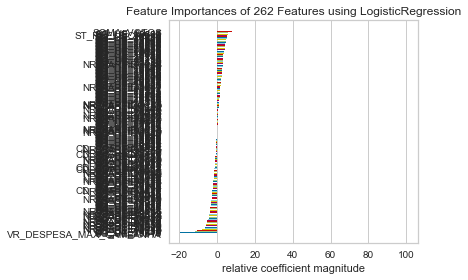

<Axes: title={'center': 'Feature Importances of 262 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [102]:
from yellowbrick.model_selection import FeatureImportances
fig = FeatureImportances(model)
fig.fit(X_train, y_train)
fig.poof()

In [103]:
# Predições
print(X.loc[[0]])
print(model.predict(X.loc[[0]])) # Classe
print(model.predict_proba(X.loc[[0]])) # Probabilidade

   VR_DESPESA_MAX_CAMPANHA     IDADE  SOMA_VOTOS  NR_PARTIDO_11  \
0                 0.039452  0.518072    0.010041              0   

   NR_PARTIDO_12  NR_PARTIDO_13  NR_PARTIDO_14  NR_PARTIDO_15  NR_PARTIDO_16  \
0              0              0              0              0              0   

   NR_PARTIDO_17  ...  SG_UE_22250  SG_UE_22276  SG_UE_22292  SG_UE_22314  \
0              0  ...            0            0            0            0   

   SG_UE_22330  SG_UE_22357  SG_UE_22373  SG_UE_22390  SG_UE_22411  \
0            0            0            0            0            0   

   SG_UE_22438  
0            0  

[1 rows x 262 columns]
[0]
[[0.84480843 0.15519157]]


In [104]:
r = {
    'metodo': 'logit',
    'resultados': model,
    'escala': stats,
    'acuracia': model.score(X_test, y_test)
}

import pickle
filename = 'modelo_eleicao_municipal.pkl'
pickle.dump(r, open(filename, "wb"))